# Labb 03 - Linjär klassificering
### En rapport om klassificering av datapunkter med olika linjer

I denna rapport undersöker jag hur olika linjer påverkar klassificeringen av datapunkter i en graf. Vi kommer att visa grafer för dessa linjer:
- y = x 
- f(x) = -0.489x
- g(x) = -2x + 0.16
- h(x) = 800x - 120

Jag kommer även visa skillnaderna emellan hur de olika linjerna påverkade klassificeringen och jämföra resultaten.


Jag började med att importera den csv-fil med data som vi skulle använda för uppgiften. Med hjälp av csv-paketet så kan koden sedan läsa av cvs-filen, varpå jag kan klassificera varenda punkt efter de linjer som är med i labben. 

Jag valde att skriva simpla men fungerande funktioner för att klassificera varenda punkt för varje linje. Jag sparar varje x- och y-värde för att kunna använda dem när varje linje ska plottas ut. Därefter så sätts punkternas x- och y-värden samt deras klassificeringar in i en lista med data. 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import csv


input_file = 'unlabelled_data.csv'

x_values = []
y_values = []
data = []


lines = {
    'y = x': (1, 0),
    'f(x) = -0.489x': (-0.489, 0),
    'g(x) = -2x + 0.16': (-2, 0.16),
    'h(x) = 800x - 120': (800, -120)
}

def classify_datapoints(x, y, k, m):
    return 1 if y > k * x + m else 0


with open(input_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    
    for row in csv_reader:
        x, y = float(row[0]), float(row[1])
        
        labels = []
        for k, m in lines.values():
            label = classify_datapoints(x, y, k, m)
            labels.append(label)
        
        x_values.append(x)
        y_values.append(y)


        data.append([x, y] + labels)


min_x = min(x_values)
max_x = max(x_values)


I funktionen **plot_a_line**, som körs en gång per linje, så placeras datapunkterna ut som antingen **röda** (nedanför linjen) eller **blå** (ovanför linjen) baserat på den klassifikation som de fick tidigare. Därefter så plottas själva linjen ut och en graf skapas för att visa varje linje och hur datapunkterna förhåller sig till den. 

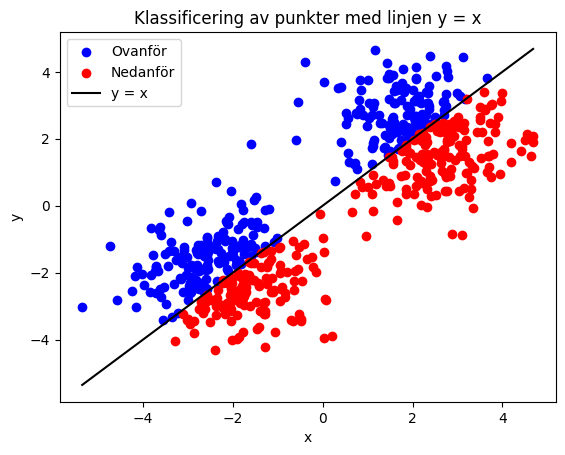

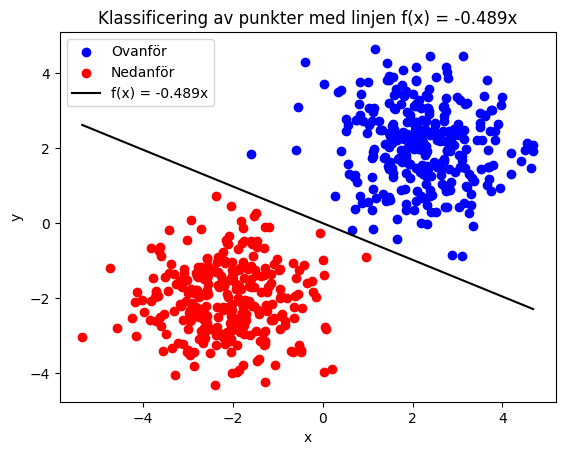

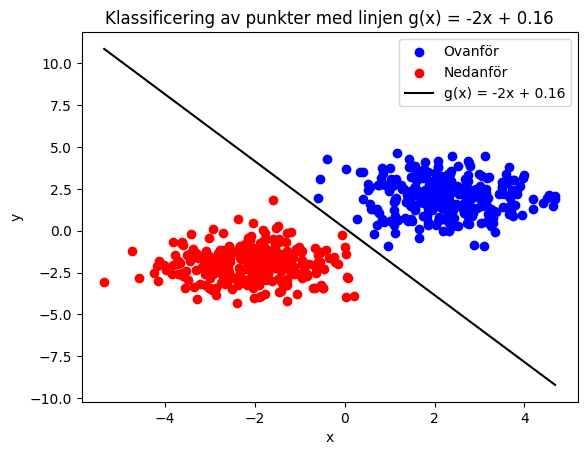

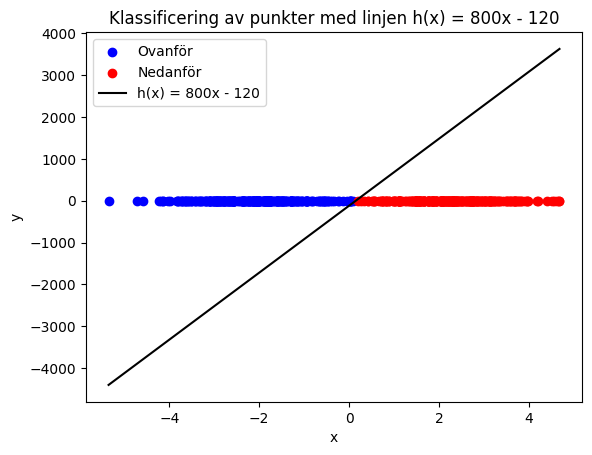

In [6]:
def plot_a_line(x_values, y_values, data, formula, line_label, classification_index):
    x_values = np.array(x_values)
    y_values = np.array(y_values)
    classifications = np.array([row[classification_index] for row in data])

    plt.scatter(x_values[classifications == 1], y_values[classifications == 1], color='blue', label='Ovanför')
    plt.scatter(x_values[classifications == 0], y_values[classifications == 0], color='red', label='Nedanför')

    min_x, max_x = x_values.min(), x_values.max()
    plt.plot([min_x, max_x], [formula(min_x), formula(max_x)], color='black', label=line_label)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Klassificering av punkter med linjen {line_label}')
    plt.legend()
    plt.show()


# y = x 
plot_a_line(x_values, y_values, data, lambda x: x, 'y = x', 2)

# f(x) = -0.489x 
plot_a_line(x_values, y_values, data, lambda x: -0.489 * x, 'f(x) = -0.489x', 3)

# g(x) = -2x + 0.16 
plot_a_line(x_values, y_values, data, lambda x: -2 * x + 0.16, 'g(x) = -2x + 0.16', 4)

# h(x) = 800x - 120 
plot_a_line(x_values, y_values, data, lambda x: 800 * x - 120, 'h(x) = 800x - 120', 5)


Vi kan redan här se att den sista grafen, med linje **h(x) = 800x - 120**, inte är en optimal linje för att dela upp och visualisera datan. Detta är på grund utav hur brant den är och hur stora dess värden blir.

In [7]:
def compare_classifications(data):
    comparisons = {
        "y_eq_x vs f": 0,
        "y_eq_x vs g": 0,
        "y_eq_x vs h": 0,
        "f vs g": 0,
        "f vs h": 0,
        "g vs h": 0,
    }
    total_points = len(data)
    
    for row in data:
        label_y_eq_x, label_f, label_g, label_h = row[2], row[3], row[4], row[5]

        if label_y_eq_x != label_f:
            comparisons["y_eq_x vs f"] += 1
        if label_y_eq_x != label_g:
            comparisons["y_eq_x vs g"] += 1
        if label_y_eq_x != label_h:
            comparisons["y_eq_x vs h"] += 1
        if label_f != label_g:
            comparisons["f vs g"] += 1
        if label_f != label_h:
            comparisons["f vs h"] += 1
        if label_g != label_h:
            comparisons["g vs h"] += 1

    print("Skillnader i klassificeringar:")
    for key, value in comparisons.items():
        percentage_difference = (value / total_points) * 100
        print(f"{key}: {value} punkter skiljer sig ({percentage_difference:.2f}%)")

compare_classifications(data)


Skillnader i klassificeringar:
y_eq_x vs f: 315 punkter skiljer sig (52.50%)
y_eq_x vs g: 317 punkter skiljer sig (52.83%)
y_eq_x vs h: 278 punkter skiljer sig (46.33%)
f vs g: 2 punkter skiljer sig (0.33%)
f vs h: 593 punkter skiljer sig (98.83%)
g vs h: 595 punkter skiljer sig (99.17%)


# En jämförelse
I koden ovan så jämför jag varje typ av linje mot alla andra linjer för att se hur många punkter de har klassificerat på samma vis.  Jag räknar sedan ut skillnaden i procent som de olika paren har vad gäller att klassificera punkterna. 

Vi kan avgöra av resultaten att:

Linje **f(x)** och linje **g(x)**  knappt skiljer sig åt med sina 0.33% skillnad.
Linje **y = x** delar ca 50% av sina klassificeringar med andra linjer.
Linje **h(x)** står ut med hur mycket den skiljer sig mot de andra linjerna (utöver **y = x**, som den delar mer med).

## Analys av skillnader i klassificering
Resultaten visar att linjerna **f(x) = -0.489x** och  **g(x) = -2x + 0.16**  klassificerar datapunkterna på ett liknande sätt, medan linjen **h(x) = 800x - 120** klassificerar datapunkterna betydligt annorlunda. Detta kan förklaras av den branta lutningen hos **h(x)**.

Nedan visas skillnaderna mellan klassificeringarna:
- **y_eq_x vs f**: 52.50%
- **y_eq_x vs g**: 52.83%
- **y_eq_x vs h**: 46.33%
- **f vs g**: 0.33%
- **f vs h**: 98.83%
- **g vs h**: 99.17%

Det är dock värt att uppmärksamma att linjen **y = x** delar ca 50% klassiciferade punkter med samtliga andra linjer, även **h(x) = 800x - 120**. Med tanke på hur linjen **h(x)** skiljer sig mot de andra linjerna så får det mig att tro att **y = x** inte är en bra linje för att klassicifera punkterna pga hur "neutral" den verkar. 


## Slutsats

### Vilka linjer som vi bör föredra och vilka vi bör undvika

Linjerna **f(x) = -0.489x** och **g(x) = -2x + 0.16** kan anses vara de mest tillförlitliga för att klassificera denna data. Detta är för att de är nästan identiska vilket innebär att de fångar samma mönster i datan och är en god representation för hur punkterna är fördelade.

Linjen **h(x)** har för brant lutning och resulterar i en klassificering som är betydligt annorlunda jämfört med de andra linjerna. Den enda linjen som den är någorlunda lik är **y = x**, men eftersom den linjen delar ca 50% av de klassificerade punkterna med samtliga linjer så anser jag inte att det säger något om hur korrekt **h(x)** är när det gäller att klassificera punkterna.

### Hur många linjer finns det egentligen?

I teorin kan vi hitta oändligt många linjer med olika lutningar och skärningspunkter, men det viktiga här är att välja linjer som har en meningsfull klassificering av datapunkterna. Om vi tittar på linje **h(x)** som exempel så kan vi se att den varken verkar fånga ett bra mönster i datan samt att dess branta lutning och höga värden gör att grafen svår att läsa av. 



